In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.shape

(50, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [8]:
data.drop('State',axis=1,inplace=True)
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [9]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
corr_matrix = data.corr()
corr_matrix

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


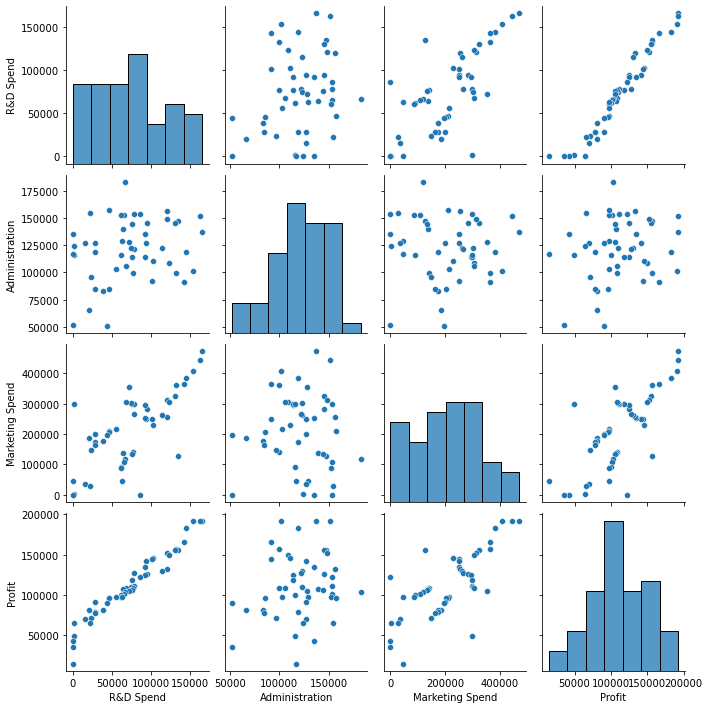

In [11]:
sns.pairplot(data)
plt.show()

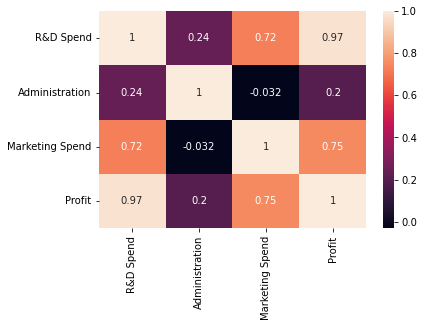

In [12]:
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [13]:
data.rename({'R&D Spend':'RDS','Marketing Spend':'Market_spend'},axis=1,inplace=True)
data.head()

,RDS,Administration,Market_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [14]:
model = smf.ols('Profit~RDS+Administration+Market_spend',data=data).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           4.53e-30
Time:                        17:17:27   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS                0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Market_spend       0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model.params

Intercept         50122.192990
RDS                   0.805715
Administration       -0.026816
Market_spend          0.027228
dtype: float64

In [17]:
model.pvalues

Intercept         1.057379e-09
RDS               2.634968e-22
Administration    6.017551e-01
Market_spend      1.047168e-01
dtype: float64

In [18]:
model.tvalues

Intercept          7.626218
RDS               17.846374
Administration    -0.525507
Market_spend       1.655077
dtype: float64

In [19]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

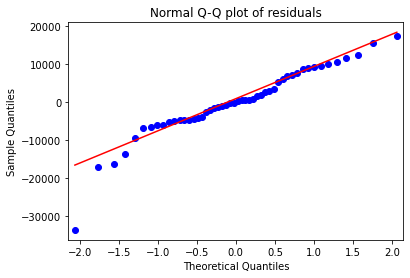

In [20]:
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

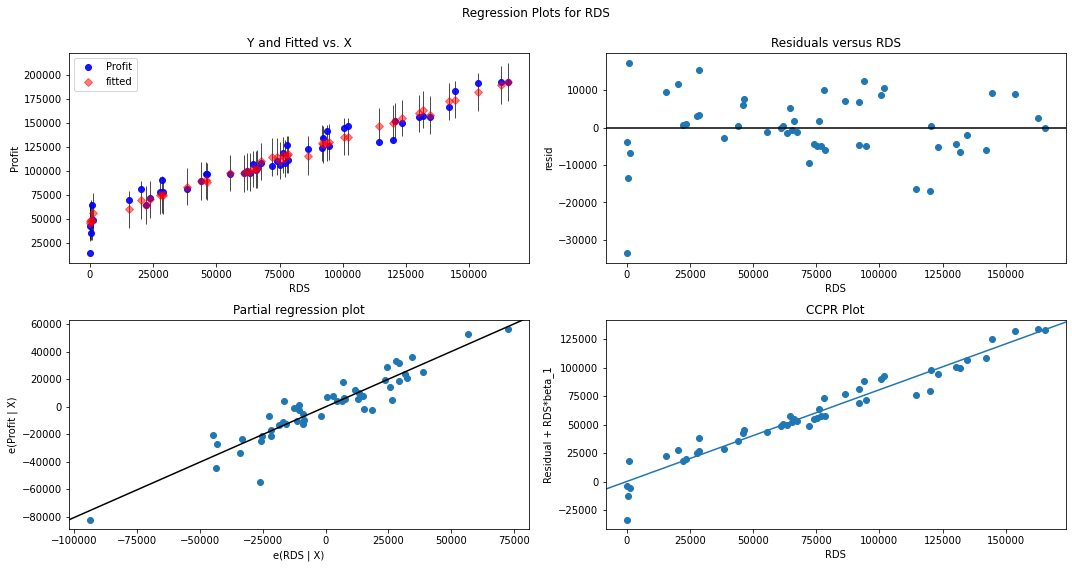

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

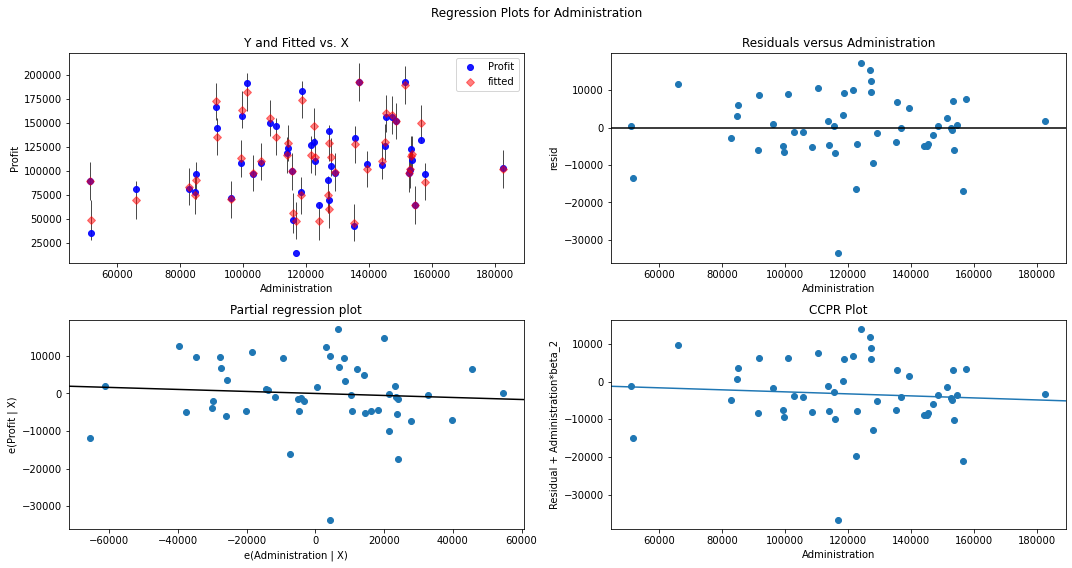

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

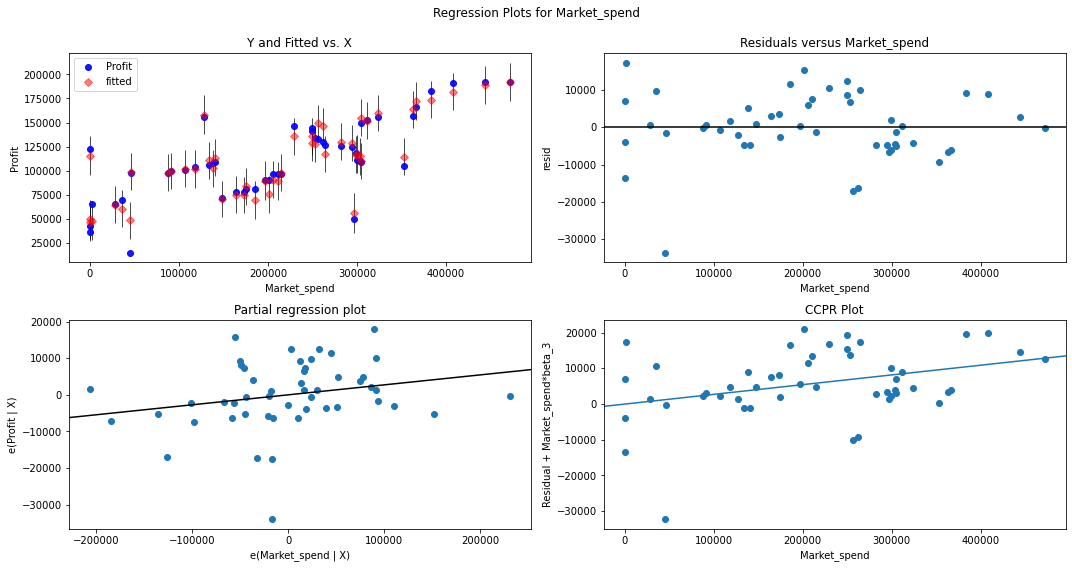

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Market_spend',fig=fig)
plt.show()

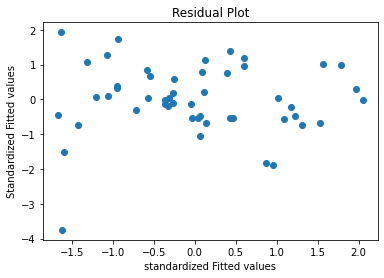

In [24]:
def get_standardized_Values(vals):
    return (vals-vals.mean())/vals.std()
plt.scatter(get_standardized_Values(model.fittedvalues),get_standardized_Values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized Fitted values') 
plt.ylabel('Standardized Fitted values')
plt.show()            

In [25]:
model_influence = model.get_influence()
(c, _)=model_influence.cooks_distance

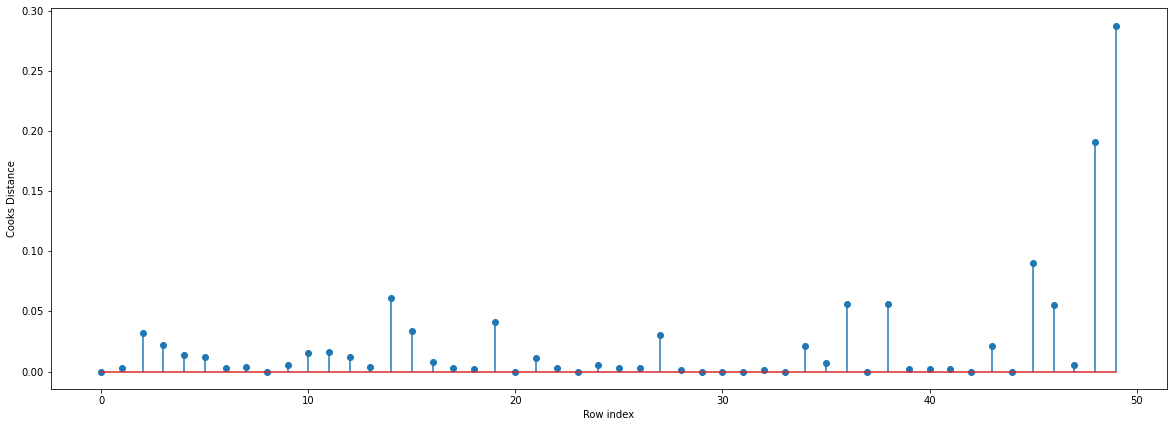

In [26]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

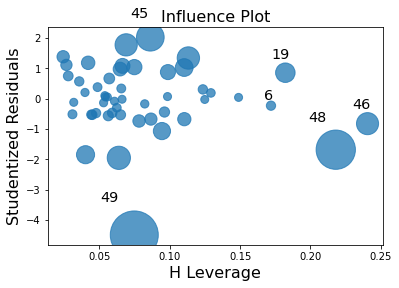

In [28]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [29]:
data.shape

(50, 4)

In [30]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff 

0.30000000000000004

In [31]:
scaled = StandardScaler()
x_scaled = scaled.fit_transform(data.iloc[:,:3])

In [32]:
x_scaled

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

In [33]:
x_scaled_df =pd.DataFrame(x_scaled)
x_scaled_df

,0,1,2
0,2.016411,0.560753,2.153943
1,1.955860,1.082807,1.923600
2,1.754364,-0.728257,1.626528
3,1.554784,-0.096365,1.422210
4,1.504937,-1.079919,1.281528
5,1.279800,-0.776239,1.254210
6,1.340066,0.932147,-0.688150
7,1.245057,0.871980,0.932186
8,1.030369,0.986952,0.830887
9,1.091819,-0.456640,0.776107


In [34]:
y = data[['Profit']]

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled_df,y,test_size=0.20,random_state=12)

In [36]:
x_train.shape,x_test.shape

((40, 3), (10, 3))

In [37]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [38]:
linear_model.coef_

array([[36174.71491195, -1753.61132977,  3661.35266955]])

In [39]:
linear_model.intercept_

array([112018.49284013])

In [40]:
y_pred_train = linear_model.predict(x_train)
y_pred_train

array([[129348.32660524],
       [ 72157.7861161 ],
       [ 92419.65168397],
       [145954.71720277],
       [ 96302.90826012],
       [147964.75889098],
       [109529.00801048],
       [155157.11394875],
       [ 98773.13788139],
       [ 46057.45981243],
       [117157.66847119],
       [117031.51496654],
       [113927.65142391],
       [ 71834.46900844],
       [ 98322.38805011],
       [ 92089.2727161 ],
       [110912.5349696 ],
       [187915.34046986],
       [ 99417.27201755],
       [173045.05085501],
       [ 63344.47518292],
       [ 85361.66227306],
       [129360.4404943 ],
       [ 75241.56270347],
       [ 59984.60584891],
       [191864.60636359],
       [135689.41798315],
       [ 48589.72444295],
       [ 87983.94057061],
       [101447.53497058],
       [126928.22700604],
       [164268.22194931],
       [114936.18204924],
       [128849.37193508],
       [ 47624.09422955],
       [173638.54894855],
       [182714.47204576],
       [156340.82954752],
       [1146

In [41]:
train_error = y_train-y_pred_train
train_error

,Profit
17,-3977.956605
38,9071.273884
37,-2470.511684
15,-16037.677203
31,1180.651740
14,-15362.108891
26,-3795.468010
9,-5397.153949
33,-1994.217881
47,-3497.729812


In [42]:
y_pred_test = linear_model.predict(x_test)
y_pred_test

array([[ 99227.78590106],
       [ 57330.42689013],
       [158942.01003194],
       [ 76443.25357295],
       [ 75488.25175017],
       [100412.02470383],
       [116367.18632661],
       [ 51779.85090037],
       [113711.10968112],
       [150603.23224831]])

In [43]:
test_error = y_test-y_pred_test
test_error

,Profit
28,4054.594099
46,-7839.676890
7,-3189.410032
41,1355.576427
36,15219.938250
29,592.615296
21,-5054.166327
48,-16106.440900
19,9065.750319
8,1608.537752


In [44]:
Mape_1 = mean_absolute_percentage_error(y_train,y_pred_train)
Mape_1

0.1113206208622505

In [45]:
Mape_2 = mean_absolute_percentage_error(y_test,y_pred_test)
Mape_2

0.09905322273410593

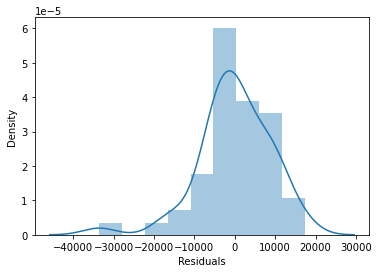

In [49]:
sns.distplot(x=model.resid)
plt.xlabel('Residuals')
plt.show()

In [47]:
model.params

Intercept         50122.192990
RDS                   0.805715
Administration       -0.026816
Market_spend          0.027228
dtype: float64

### Profit = 50122.19 + 0.8057 * RDS - 0.0268 * Administration + 0.0272 * Market_spend 